In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os
import random
import torch
from torch import nn, optim

from torch.nn import functional as F
from torchvision import transforms as T
from torch.utils.data import DataLoader, Dataset, random_split
import torchvision.transforms.functional as TF

import PIL
from PIL import Image

In [3]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cuda


**Preprocessing**

Change format for images: JPG -> PNG

In [38]:
from PIL import Image
import os
ROOT_FOLDER_IMAGES='trainsetRNN/image_copy'
for folder_typeOfDataAug in os.listdir(ROOT_FOLDER_IMAGES):
    for folder_videoCaptured in os.listdir(os.path.join(ROOT_FOLDER_IMAGES,folder_typeOfDataAug)):
        folder_images_path = os.path.join(ROOT_FOLDER_IMAGES,folder_typeOfDataAug,folder_videoCaptured)
            
        # Obtener la lista de archivos en la carpeta
        archivos = os.listdir(folder_images_path)

        # Procesar cada archivo en la carpeta
        for archivo in archivos:
            # Comprobar si el archivo es una imagen JPG
            if archivo.endswith(".jpg") or archivo.endswith(".jpeg"):
                # Ruta completa de la imagen JPG
                ruta_imagen_jpg = os.path.join(folder_images_path, archivo)

                # Abrir la imagen JPG
                imagen_jpg = Image.open(ruta_imagen_jpg)

                # Cambiar el formato de la imagen a PNG
                nombre_archivo, _ = os.path.splitext(archivo)  # Obtener el nombre del archivo sin la extensión
                ruta_imagen_png = os.path.join(folder_images_path, nombre_archivo + ".png")  # Ruta completa de la imagen PNG

                # Guardar la imagen en formato PNG
                imagen_jpg.save(ruta_imagen_png, "PNG")

                # Opcionalmente, eliminar la imagen JPG original
                os.remove(ruta_imagen_jpg)

Process masks: Add masks in case there are less than original

In [63]:
import re
import time
from IPython.display import display
ROOT_FOLDER_IMAGES='trainsetRNN/image_copy'
ROOT_FOLDER_MASKS='trainsetRNN/truthWithoutSequences'
for folder_typeOfDataAug in os.listdir(ROOT_FOLDER_MASKS):
    for folder_videoCaptured in os.listdir(os.path.join(ROOT_FOLDER_MASKS,folder_typeOfDataAug)):
        folder_masks_path = os.path.join(ROOT_FOLDER_MASKS,folder_typeOfDataAug,folder_videoCaptured)
        folder_images_path = os.path.join(ROOT_FOLDER_IMAGES,folder_typeOfDataAug,folder_videoCaptured)
        list_masks = os.listdir(folder_masks_path)
        
        listaMasksFaltantesPaths=[os.path.join(folder_masks_path, image) for image in os.listdir(folder_images_path) if image not in list_masks]
        print(listaMasksFaltantesPaths)
        for new_mask_path in listaMasksFaltantesPaths:
            mask = Image.new("1", (720, 1080), color=0)
            #display(mask)
            mask.save(new_mask_path)


['trainsetRNN/truthWithoutSequences\\original\\videoPrueba4\\frame_0.png', 'trainsetRNN/truthWithoutSequences\\original\\videoPrueba4\\frame_1.png', 'trainsetRNN/truthWithoutSequences\\original\\videoPrueba4\\frame_10.png', 'trainsetRNN/truthWithoutSequences\\original\\videoPrueba4\\frame_100.png', 'trainsetRNN/truthWithoutSequences\\original\\videoPrueba4\\frame_101.png', 'trainsetRNN/truthWithoutSequences\\original\\videoPrueba4\\frame_102.png', 'trainsetRNN/truthWithoutSequences\\original\\videoPrueba4\\frame_103.png', 'trainsetRNN/truthWithoutSequences\\original\\videoPrueba4\\frame_104.png', 'trainsetRNN/truthWithoutSequences\\original\\videoPrueba4\\frame_105.png', 'trainsetRNN/truthWithoutSequences\\original\\videoPrueba4\\frame_106.png', 'trainsetRNN/truthWithoutSequences\\original\\videoPrueba4\\frame_107.png', 'trainsetRNN/truthWithoutSequences\\original\\videoPrueba4\\frame_108.png', 'trainsetRNN/truthWithoutSequences\\original\\videoPrueba4\\frame_109.png', 'trainsetRNN/tru

Process masks: Cambiar de rojo a blanco la mascara

In [43]:
import re
import time
from IPython.display import display
ROOT_FOLDER_MASKS='trainsetRNN/truthWithoutSequences'
for folder_typeOfDataAug in os.listdir(ROOT_FOLDER_MASKS):
    for folder_videoCaptured in os.listdir(os.path.join(ROOT_FOLDER_MASKS,folder_typeOfDataAug)):
        folder_images_path = os.path.join(ROOT_FOLDER_MASKS,folder_typeOfDataAug,folder_videoCaptured)
        ordered = os.listdir(os.path.join(folder_images_path))
        ordered = [name[6:] for name in ordered]
        print(ordered)
        ordered.sort(key=lambda f: int(re.sub('\D', '', f)))
        print(ordered)
        image_list = [os.path.join(folder_images_path, "frame_"+image) for image in ordered]
        print(image_list)
        for image_path in image_list:
            image = Image.open(image_path)
            thresh = 1
            fn = lambda x : 255 if x > thresh else 0
            imagen_bn = image.convert('L').point(fn, mode='1')
            print(imagen_bn.size)
            #print(imagen_bn.mode)
            #display(imagen_bn)
            #imagen_bn.save(image_path)


['125.png', '126.png', '127.png', '128.png', '129.png', '130.png', '131.png', '132.png', '133.png', '134.png', '135.png', '136.png', '137.png', '138.png', '139.png', '140.png', '141.png', '142.png', '143.png', '144.png', '145.png', '146.png', '147.png', '148.png', '149.png', '150.png', '151.png', '152.png', '153.png', '154.png', '155.png', '156.png', '157.png', '158.png', '159.png', '160.png', '161.png', '162.png', '163.png', '164.png', '165.png', '166.png', '167.png', '168.png', '169.png', '170.png', '171.png', '172.png', '173.png', '174.png', '175.png', '176.png', '177.png', '178.png', '179.png', '180.png', '181.png', '182.png', '183.png', '184.png', '185.png', '186.png', '187.png', '188.png', '189.png', '190.png', '191.png', '192.png', '193.png', '194.png', '195.png', '196.png', '197.png', '198.png', '199.png', '200.png', '201.png', '202.png', '203.png', '204.png', '205.png', '206.png', '207.png', '208.png', '209.png', '210.png', '211.png', '212.png', '213.png', '214.png', '215.png'

**DATASET**

In [52]:
def agruparSecuencias(batch):
    
    # Add channel dim, scale pixels between 0 and 1, send to GPU
    batch = torch.tensor(batch).unsqueeze(1)     
    batch = batch / 255.0                        
    batch = batch.to(device)                     

    # Randomly pick 10 frames as input, 11th frame is target
    rand = np.random.randint(10,20)                     
    return batch[:,:,rand-10:rand], batch[:,:,rand]     

In [53]:
import re
ROOT_FOLDER_IMAGES='trainset/trainset/image'
ROOT_FOLDER_MASKS='trainset/trainset/truth'

#PROBANDO
'''
for folder_typeOfDataAug in os.listdir(ROOT_FOLDER_IMAGES):
    #print(folder_typeOfDataAug)
    for folder_videoCaptured in os.listdir(os.path.join(ROOT_FOLDER_IMAGES,folder_typeOfDataAug)):
        #print(" ",folder_videoCaptured)
        for folder_sequence in os.listdir(os.path.join(ROOT_FOLDER_IMAGES,folder_typeOfDataAug,folder_videoCaptured)):
            #print("  ", folder_sequence)
            #print(sum(1 for entry in os.scandir(os.path.join(ROOT_FOLDER_IMAGES,folder_typeOfDataAug,folder_videoCaptured, folder_sequence)) if entry.is_file()))
            print(type(os.listdir(os.path.join(ROOT_FOLDER_IMAGES,folder_typeOfDataAug,folder_videoCaptured, folder_sequence))))
            for image in os.listdir(os.path.join(ROOT_FOLDER_IMAGES,folder_typeOfDataAug,folder_videoCaptured, folder_sequence)):
                #print("   ", image)
                pass
'''
list=[]
Sequences_dict={"Images":[], "Mask_output":[]}
for folder_typeOfDataAug in os.listdir(ROOT_FOLDER_IMAGES):
    for folder_videoCaptured in os.listdir(os.path.join(ROOT_FOLDER_IMAGES,folder_typeOfDataAug)):
        for folder_sequence in os.listdir(os.path.join(ROOT_FOLDER_IMAGES,folder_typeOfDataAug,folder_videoCaptured)):
            folder_images_path = os.path.join(ROOT_FOLDER_IMAGES,folder_typeOfDataAug,folder_videoCaptured, folder_sequence)
            ordered = os.listdir(os.path.join(folder_images_path))
            ordered.sort(key=lambda f: int(re.sub('\D', '', f)))
            image_list = [os.path.join(folder_images_path, image) for image in ordered]

            folder_masks_path = os.path.join(ROOT_FOLDER_MASKS,folder_typeOfDataAug,"clips_20_truth",folder_videoCaptured)
            mask_filename = folder_sequence+".jpg"
            mask = os.path.join(folder_masks_path, mask_filename)

            Sequences_dict["Images"]=image_list[-5:]
            Sequences_dict["Mask_output"]=mask
            list.append(Sequences_dict)
            print(Sequences_dict)

{'Images': ['trainset/trainset/image\\origin\\0313-1\\10000\\16.jpg', 'trainset/trainset/image\\origin\\0313-1\\10000\\17.jpg', 'trainset/trainset/image\\origin\\0313-1\\10000\\18.jpg', 'trainset/trainset/image\\origin\\0313-1\\10000\\19.jpg', 'trainset/trainset/image\\origin\\0313-1\\10000\\20.jpg'], 'Mask_output': 'trainset/trainset/truth\\origin\\clips_20_truth\\0313-1\\10000.jpg'}
{'Images': ['trainset/trainset/image\\origin\\0313-1\\10020\\16.jpg', 'trainset/trainset/image\\origin\\0313-1\\10020\\17.jpg', 'trainset/trainset/image\\origin\\0313-1\\10020\\18.jpg', 'trainset/trainset/image\\origin\\0313-1\\10020\\19.jpg', 'trainset/trainset/image\\origin\\0313-1\\10020\\20.jpg'], 'Mask_output': 'trainset/trainset/truth\\origin\\clips_20_truth\\0313-1\\10020.jpg'}
{'Images': ['trainset/trainset/image\\origin\\0313-1\\10040\\16.jpg', 'trainset/trainset/image\\origin\\0313-1\\10040\\17.jpg', 'trainset/trainset/image\\origin\\0313-1\\10040\\18.jpg', 'trainset/trainset/image\\origin\\0313

In [83]:
class CrackDatasetRNN(Dataset):
    def __init__(self, dataPath, masksPath, img_transforms=None, mask_transforms=None, sequence_size=5):

        self.train_data = dataPath
        self.train_masks = masksPath
        
        self.img_transforms = img_transforms
        self.mask_transforms = mask_transforms
        
        self.listSequences=[]
        self.sequence_size = sequence_size
        
        for folder_typeOfDataAug in os.listdir(ROOT_FOLDER_IMAGES):
            for folder_videoCaptured in os.listdir(os.path.join(ROOT_FOLDER_IMAGES,folder_typeOfDataAug)):
                for folder_sequence in os.listdir(os.path.join(ROOT_FOLDER_IMAGES,folder_typeOfDataAug,folder_videoCaptured)):
                    folder_images_path = os.path.join(ROOT_FOLDER_IMAGES,folder_typeOfDataAug,folder_videoCaptured, folder_sequence)
                    ordered = os.listdir(os.path.join(folder_images_path))
                    ordered.sort(key=lambda f: int(re.sub('\D', '', f)))
                    image_list_paths = [os.path.join(folder_images_path, image) for image in ordered]

                    folder_masks_path = os.path.join(ROOT_FOLDER_MASKS,folder_typeOfDataAug,"clips_20_truth",folder_videoCaptured)
                    mask_filename = folder_sequence+".jpg"
                    mask = os.path.join(folder_masks_path, mask_filename)
                    Sequences_dict={"Images":[], "Mask_output":[]}
                    Sequences_dict["Images"]=image_list_paths[-sequence_size:]
                    Sequences_dict["Mask_output"]=mask
                    self.listSequences.append(Sequences_dict)
                    #print(Sequences_dict)
                    
    def __len__(self):
        return len(self.listSequences)    
    def __getitem__(self, idx):
        listImagesPaths =self.listSequences[idx]["Images"]
        listImages=[]
        for imagePath in listImagesPaths:
            imageOpened = Image.open(imagePath)    
            trans = T.ToTensor()
            if self.img_transforms is not None:
                img = self.img_transforms(imageOpened)
            else:
                img =trans(imageOpened)
            listImages.append(img)
        #print(listImagesPaths)
        listImagesTorch = torch.stack(listImages)
        
        if self.train_masks is not None:
            mask_path = self.listSequences[idx]["Mask_output"]
            mask = Image.open(mask_path)
            if self.mask_transforms is not None:
                mask = self.mask_transforms(mask)
            else:
                mask = trans(mask)
        else:
            return img
        
        return listImagesTorch, mask    

In [84]:
transform_data = T.Compose([
                T.Resize([224, 224]),
                T.ToTensor(),
                T.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])])

transform_data_target = T.Compose([
                T.Resize([224, 224]),
                #T.Grayscale(1),
                T.ToTensor(),
                T.Lambda(lambda x: torch.where(x > 0.5, torch.tensor([1.0]), torch.tensor([0.0])))
                ])

In [85]:
full_dataset = CrackDatasetRNN(ROOT_FOLDER_IMAGES,
                           ROOT_FOLDER_MASKS,
                           img_transforms=transform_data,
                           mask_transforms=transform_data_target,
                           sequence_size=5)

In [86]:
BATCH_SIZE = 8
TRAIN_SIZE = int(len(full_dataset)*0.8)
VAL_SIZE = len(full_dataset) - TRAIN_SIZE
print(TRAIN_SIZE, VAL_SIZE)
train_dataset, val_dataset = random_split(full_dataset, [TRAIN_SIZE, VAL_SIZE])
print(train_dataset[0][0].shape)
print(train_dataset[0][1].shape)

15276 3820
torch.Size([5, 3, 224, 224])
torch.Size([1, 224, 224])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


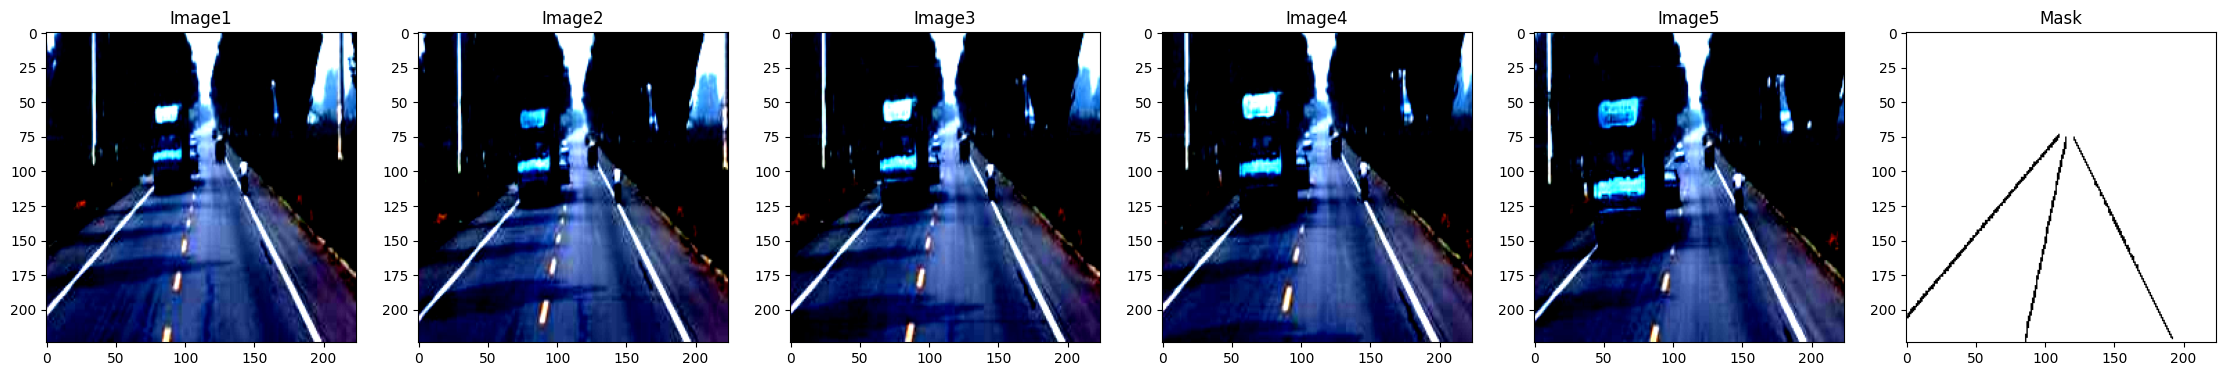

In [87]:
#Check image and mask
id = 2
fig, ax = plt.subplots(1, 6, figsize=(28, 6))
ax[0].imshow(train_dataset[id][0][0].permute(1, 2, 0));ax[0].set_title("Image1")
ax[1].imshow(train_dataset[id][0][1].permute(1, 2, 0));ax[1].set_title("Image2")
ax[2].imshow(train_dataset[id][0][2].permute(1, 2, 0));ax[2].set_title("Image3")
ax[3].imshow(train_dataset[id][0][3].permute(1, 2, 0));ax[3].set_title("Image4")
ax[4].imshow(train_dataset[id][0][4].permute(1, 2, 0));ax[4].set_title("Image5")
ax[5].imshow(train_dataset[id][1][0],'binary');ax[5].set_title("Mask")
plt.show()

**DATALOADER**

In [88]:
train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=BATCH_SIZE, shuffle=True)

In [89]:
imgs, masks = next(iter(train_loader))
print(imgs.shape, masks.shape)

torch.Size([8, 5, 3, 224, 224]) torch.Size([8, 1, 224, 224])
